# **Import Modules**

In [2]:
# Numpy is needed to generate the data
import numpy as np
# Matplotlib is needed for visualization
import matplotlib.pyplot as plt
# TensorFlow is needed for model build
import tensorflow as tf

# **Data Generation**

In [4]:
# We use this line to make the code reproducible (to get the same results when running)
np.random.seed(42)
# First, we should declare a variable containing the size of the training set we want to generate
observations = 1000

# Let us assume we have the following relationship
# y = 13x + 2
# y is the output and x is the input or feature
# We generate the feature randomly, drawing from an uniform distribution. There are 3 arguments of this method (low, high, size).
# The size of x is observations by 1. In this case: 1000 x 1.
x = np.random.uniform(low=-10, high=10, size=(observations,1))

np.random.seed(42)
# We add a small noise to our function for more randomness
noise = np.random.uniform(-1, 1, (observations,1))

# Produce the targets according to the f(x) = 13x + 2 + noise definition.
# This is a simple linear relationship with one weight and bias.
# In this way, we are basically saying: the weight is 13 and the bias is 2.
targets = 13*x + 2 + noise

# Save into an npz file called "TF_intro"
# This is just a step of saving the numpy arrays in a file for later access
np.savez('TF_intro', inputs=x, targets=targets)

# **Load the Training Data**

In [5]:
# Load the training data from the NPZ
training_data = np.load('TF_intro.npz')

# **Model Build**

In [8]:
# Declare a variable where we will store the input size of our model
# It should be equal to the number of variables you have
input_size = 1
# Declare the output size of the model
# It should be equal to the number of outputs you've got (for regressions that's usually 1)
output_size = 1

# Outline the model
# We lay out the model in 'Sequential'
# Note that there are no calculations involved - we are just describing our network
model = tf.keras.Sequential([
                            # Each 'layer' is listed here
                            # The method 'Dense' indicates, our mathematical operation to be (xw + b)
                            tf.keras.layers.Input(shape=(input_size , )),
                            tf.keras.layers.Dense(output_size,
                                                 # there are extra arguments you can include to customize your model
                                                 # in our case we are just trying to create a solution that is 
                                                 # as close as possible to our NumPy model
                                                 # kernel here is just another name for the weight parameter
                                                 kernel_initializer=tf.random_uniform_initializer(minval=-0.1, maxval=0.1),
                                                 bias_initializer=tf.random_uniform_initializer(minval=-0.1, maxval=0.1)
                                                 )
                            ])

# Print the structure of the model
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 1)                 2         
Total params: 2
Trainable params: 2
Non-trainable params: 0
_________________________________________________________________


# **Model Compile**

In [9]:
# We can also define a custom optimizer, where we can specify the learning rate
custom_optimizer = tf.keras.optimizers.SGD(learning_rate=0.02)

# 'compile' is the place where you select and indicate the optimizers and the loss
# Our loss here is the mean square error
model.compile(optimizer=custom_optimizer, loss='mse')

# **Model Training**

In [10]:
# finally we fit the model, indicating the inputs and targets
# if they are not otherwise specified the number of epochs will be 1 (a single epoch of training), 
# so the number of epochs is 'kind of' mandatory, too
# we can play around with verbose; we prefer verbose=2
model.fit(training_data['inputs'], training_data['targets'], epochs=100, verbose=2)

Epoch 1/100
32/32 - 0s - loss: 132.9088
Epoch 2/100
32/32 - 0s - loss: 0.0627
Epoch 3/100
32/32 - 0s - loss: 0.0043
Epoch 4/100
32/32 - 0s - loss: 3.5598e-04
Epoch 5/100
32/32 - 0s - loss: 2.2678e-05
Epoch 6/100
32/32 - 0s - loss: 1.8171e-06
Epoch 7/100
32/32 - 0s - loss: 1.2947e-07
Epoch 8/100
32/32 - 0s - loss: 9.9054e-09
Epoch 9/100
32/32 - 0s - loss: 7.1980e-10
Epoch 10/100
32/32 - 0s - loss: 7.6422e-11
Epoch 11/100
32/32 - 0s - loss: 2.0627e-11
Epoch 12/100
32/32 - 0s - loss: 1.8715e-11
Epoch 13/100
32/32 - 0s - loss: 1.7517e-11
Epoch 14/100
32/32 - 0s - loss: 1.5827e-11
Epoch 15/100
32/32 - 0s - loss: 1.6392e-11
Epoch 16/100
32/32 - 0s - loss: 1.7145e-11
Epoch 17/100
32/32 - 0s - loss: 1.9685e-11
Epoch 18/100
32/32 - 0s - loss: 1.7308e-11
Epoch 19/100
32/32 - 0s - loss: 1.6812e-11
Epoch 20/100
32/32 - 0s - loss: 1.8451e-11
Epoch 21/100
32/32 - 0s - loss: 1.5645e-11
Epoch 22/100
32/32 - 0s - loss: 1.5534e-11
Epoch 23/100
32/32 - 0s - loss: 1.6944e-11
Epoch 24/100
32/32 - 0s - loss

# **Extract the Parameters**

In [22]:
# Extracting the weights and biases is achieved quite easily
model.layers[0].get_weights()

# We can save the weights and biases in separate variables for easier examination
# Note that there can be hundreds or thousands of them!
weights = model.layers[0].get_weights()[0]

bias = model.layers[0].get_weights()[1]
bias,weights

(array([1.9999999], dtype=float32), array([[13.1]], dtype=float32))

# **Model Prediction**

In [19]:
# We can predict new values in order to actually make use of the model
# Sometimes it is useful to round the values to be able to read the output
# Usually we use this method on NEW DATA, rather than our original training data
# We use the model here on the training data for comparison
model.predict_on_batch(training_data['inputs']).round(1)

array([[-3.090e+01],
       [ 1.201e+02],
       [ 6.280e+01],
       [ 2.780e+01],
       [-8.810e+01],
       [-8.810e+01],
       [-1.138e+02],
       [ 9.790e+01],
       [ 2.850e+01],
       [ 5.650e+01],
       [-1.236e+02],
       [ 1.251e+02],
       [ 8.910e+01],
       [-7.340e+01],
       [-8.140e+01],
       [-8.090e+01],
       [-4.930e+01],
       [ 8.500e+00],
       [-1.580e+01],
       [-5.270e+01],
       [ 3.130e+01],
       [-9.250e+01],
       [-5.250e+01],
       [-3.300e+01],
       [-9.500e+00],
       [ 7.670e+01],
       [-7.670e+01],
       [ 5.700e+00],
       [ 2.620e+01],
       [-1.168e+02],
       [ 3.020e+01],
       [-8.430e+01],
       [-1.120e+02],
       [ 1.196e+02],
       [ 1.240e+02],
       [ 8.280e+01],
       [-4.920e+01],
       [-1.034e+02],
       [ 5.030e+01],
       [-1.370e+01],
       [-9.700e+01],
       [ 7.000e-01],
       [-1.200e+02],
       [ 1.092e+02],
       [-6.120e+01],
       [ 4.460e+01],
       [-4.730e+01],
       [ 7.30

# **Real Vs Predicted Targets**

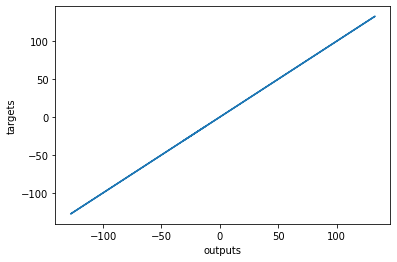

In [21]:
# The model is optimized, so the outputs are calculated based on the last form of the model

# We have to np.squeeze the arrays in order to fit them to what the plot function expects.
# Doesn't change anything as we cut dimensions of size 1 - just a technicality.
plt.plot(np.squeeze(model.predict_on_batch(training_data['inputs'])), np.squeeze(training_data['targets']))
plt.xlabel('outputs')
plt.ylabel('targets')
plt.show()

# You probably don't see the point of TensorFlow now - it took us the same number of lines of code
# Once we go deeper, things will start to get messy and TensorFlow will save you a lot of work